In [8]:
# Load dataset
import pandas as pd
import numpy as np

df = pd.read_csv('income.csv', usecols=['Age', 'Income($)'])
df.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [10]:
# Scaling Age and Income
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df['Age'] = sc.fit_transform(df[['Age']])
df['Income($)'] = sc.fit_transform(df[['Income($)']])
df.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


<Axes: xlabel='Age', ylabel='Income($)'>

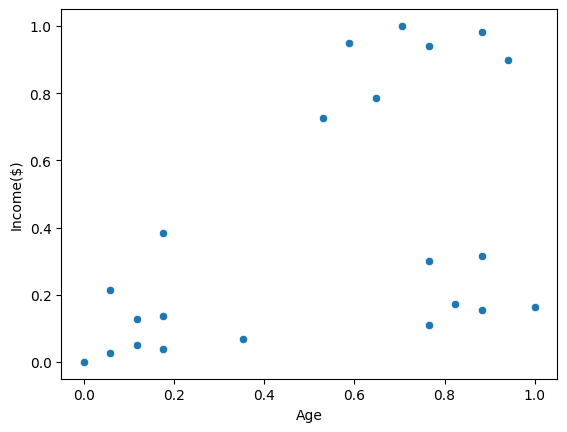

In [11]:
# Plotting scatterplot
import seaborn as sns
sns.scatterplot(x=df['Age'], y=df['Income($)'])

Text(0, 0.5, 'SSE')

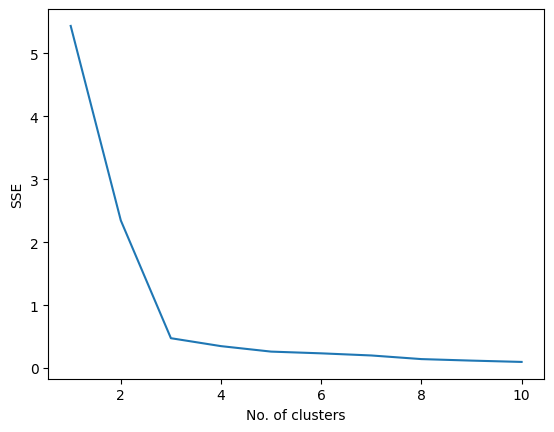

In [12]:
# Applying Elbow method to determine ideal no. of clusters(k)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []

for k in range(1, 11):
  km = KMeans(n_clusters=k, init="k-means++")
  km.fit(df)
  sse.append(km.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel('No. of clusters')
plt.ylabel('SSE')

In [14]:
# Applying kmeans on k=3
km = KMeans(n_clusters=3, init="k-means++")
y_pred = km.fit_predict(df)
print(y_pred)
print(km.cluster_centers_)

[2 2 2 2 1 1 1 1 1 1 1 2 2 2 2 2 0 0 0 0 0 0]
[[0.85294118 0.2022792 ]
 [0.72268908 0.8974359 ]
 [0.1372549  0.11633428]]


<Axes: xlabel='Age', ylabel='Income($)'>

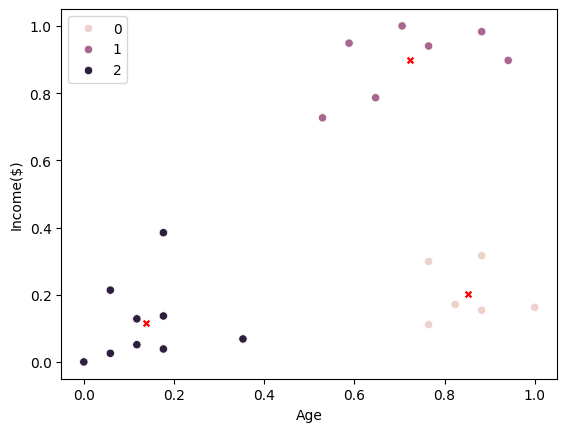

In [23]:
# Display the clusters
df['cluster'] = y_pred
sns.scatterplot(x=df['Age'], y=df['Income($)'], hue=df['cluster'])
sns.scatterplot(x=km.cluster_centers_[:,0], y=km.cluster_centers_[:, 1], color='red', marker='X')

In [24]:
# Evaluate how well the clusters are
from sklearn.metrics import silhouette_score
print(silhouette_score(df, y_pred))

0.8440849267382081
